# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project: Keywords Extraction using Transformer

## Learning Objectives

At the end of the experiment, you will be able to :

* perform data preprocessing, EDA and feature extraction on the Medical Transcription dataset
* build transformer components - positional embedding, encoder, decoder, etc
* train a transformer model for keywords extraction
* create function to perform inference using trained transformer
* use the gradio library  to generate a customizable UI for displaying the extracted keywords

## Dataset description

The dataset used in this project is the **Medical transcription** dataset. It contains sample medical transcriptions for various medical specialties.

The data is in CSV format with below features:

- **description**

- **medical_specialty**

- **sample_name**

- **transcription**

- **keywords**

##  Grading = 10 Points

## Information

Medical transcriptions are textual records of patient-doctor interactions, medical procedures, clinical findings, and more. Extracting keywords from these transcriptions can provide valuable insights into a patient's health status, medical history, and treatment plans.

* Significance:

  - Data Summarization: Keyword extraction helps in summarizing lengthy medical transcriptions, making it easier for healthcare professionals to quickly understand the patient's medical history.

  - Search and Retrieval: Extracted keywords can be used to index medical records, facilitating faster search and retrieval of relevant documents.

  - Trend Analysis: By analyzing frequently occurring keywords, healthcare institutions can identify common ailments, treatment outcomes, and more.

* Applications:

  - Clinical Decision Support: Extracted keywords can be used to develop clinical decision support systems that provide real-time suggestions to healthcare professionals.
  - Patient Monitoring: By continuously analyzing the keywords from a patient's medical transcriptions, healthcare systems can monitor the patient's health and predict potential health risks.
  - Research: Medical researchers can use extracted keywords to identify trends, study disease outbreaks, and understand treatment efficacies.
  - Billing and Insurance: Keywords can help in automating the medical coding process, which is essential for billing and insurance claims.

### Problem Statement

Build a transformer model for performing keywords extraction on medical transcription dataset.

**Note:**
> For some steps such as how to create a positional embedding layer, transformer components - encoder and decoder blocks, etc you may need to refer to the ***M3 Assignment-5 on Transformer_Decoder***.

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import re
import random
import string
from string import digits
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer, tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#@title Download the dataset
!wget -q https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/Medical_transcription_dataset.csv
!ls | grep ".csv"

Medical_transcription_dataset.csv


**Exercise 1: Read the Medical_transcription_dataset.csv dataset**

**Hint:** pd.read_csv()

In [ ]:
# Load the dataset
# YOUR CODE HERE
df = pd.read_csv('/content/Medical_transcription_dataset.csv', encoding='utf-8')
# Display the first few rows
print(df.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                         description  \
0   A 23-year-old white female presents with complaint of allergies.   
1                           Consult for laparoscopic gastric bypass.   
2                           Consult for laparoscopic gastric bypass.   
3                                             2-D M-Mode. Doppler.     
4                                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

 

### Pre-processing and EDA

**Exercise 2: Perform below operations on the dataset [0.5 Mark]**

- Remove unnecessary columns - 'Unnamed: 0'
- Handle missing values
- Remove rows from data where `keywords` is only single empty space ' $ $ '
- Remove duplicates from data considering `transcription` and `keywords` columns


- **Remove unnecessary columns - 'Unnamed: 0'**

In [ ]:
# YOUR CODE HERE
df = df.drop(columns=['Unnamed: 0'])

- **Handle missing values**

In [ ]:
# Drop missing values
# YOUR CODE HERE
def handle_missing_values(df):
   df_cleaned = df.copy()
   print("Missing values count:\n", df_cleaned.isnull().sum())
   print("\nPercentage of missing values:\n", (df_cleaned.isnull().sum() / len(df_cleaned) * 100))

   # 2. Drop rows with all missing values
   df_cleaned = df_cleaned.dropna(how='all')
   numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
   for col in numeric_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

    # 4. Handle categorical columns
    #categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
    #for col in categorical_columns:
        # Fill with mode (most frequent value)
        #df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
   print(df_cleaned.head)
   return df_cleaned

In [ ]:
df = df[df['keywords'].notnull()]
df = df[df['transcription'].notnull()]

- **Remove rows from data where `keywords` is only single empty space ' '**

In [ ]:
cleaned_df = handle_missing_values(df)
#print(cleaned_df.shape)
##summary = pd.DataFrame(df.dtypes,columns=['dtype'])
#summary['Null_counts']=df.isnull().sum().values
#print(df['keywords'])
dataCopy = cleaned_df.copy()
space_df = dataCopy[~dataCopy['keywords'].str.isspace()]
print(space_df.isnull().sum().values)
#dataCopy = cleaned_df.copy()

#dataCopy['keywords'] = imputer.fit_transform(dataCopy['keywords'].to_frame())
def clean_keywords_method1(df):
    # Remove rows where keywords is a single space
    cleaned_df = df[df['keywords'].str.strip() != '']


    return cleaned_df

 # Remove extra whitespace


Missing values count:
 description          0
medical_specialty    0
sample_name          0
transcription        0
keywords             0
dtype: int64

Percentage of missing values:
 description          0.0
medical_specialty    0.0
sample_name          0.0
transcription        0.0
keywords             0.0
dtype: float64
<bound method NDFrame.head of                                                                                                                                                                                                   description  \
0                                                                                                                                            A 23-year-old white female presents with complaint of allergies.   
1                                                                                                                                                                    Consult for laparoscopic gastric bypass.   
2                   

In [ ]:
# Count of rows where keywords are ' '
# YOUR CODE HERE
count1 = sum(df['keywords'].str.strip() == '')
print(count1)
#keywords_column = cleaned_df['keywords'].


81


In [ ]:
# Remove rows where keywords are ' '
# YOUR CODE HERE
cleaned_df = df[df['keywords'].str.strip() != '']
#data['Cleaned_Resume'] = data['Resume'].apply(clean_keywords_method1)
print(cleaned_df)

                                                                                                                                                                                                  description  \
0                                                                                                                                            A 23-year-old white female presents with complaint of allergies.   
1                                                                                                                                                                    Consult for laparoscopic gastric bypass.   
2                                                                                                                                                                    Consult for laparoscopic gastric bypass.   
3                                                                                                                                                                   

- **Remove duplicates from data considering `transcription` and `keywords` columns**

In [ ]:
# Check duplicates
# YOUR CODE HERE
print("Original shape:", df.shape)
print("Original shape:", cleaned_df.shape)

duplicates = df[df.duplicated(subset=['transcription', 'keywords'], keep=False)]

print("\nDuplicate Analysis:")
print(f"Number of duplicate rows: {len(duplicates)}")
print(f"Percentage of duplicate rows: {(len(duplicates) / len(df) * 100):.2f}%")
print(duplicates.head())
df_cleaned = df.drop_duplicates(subset=['transcription', 'keywords'], keep='first')

print("\nShape after removing duplicates:", df_cleaned.shape)
print(f"Total rows removed: {len(df) - len(df_cleaned)}")


Original shape: (3898, 5)
Original shape: (3817, 5)

Duplicate Analysis:
Number of duplicate rows: 80
Percentage of duplicate rows: 2.05%
                                                                                                                                                                                                 description  \
149   Exploratory laparotomy, resection of small bowel lesion, biopsy of small bowel mesentery, bilateral extended pelvic and iliac lymphadenectomy (including preaortic and precaval, bilateral common i...   
307                                              Total abdominal hysterectomy (TAH) and left salpingo-oophorectomy.  Hypermenorrhea, uterine fibroids, pelvic pain, left adnexal mass, and pelvic adhesions.   
323                                                                                                                       Open Stamm gastrotomy tube, lysis of adhesions, and closure of incidental colotomy   
368                           

**Exercise 3: Display  all the categories of `medical_specialty` and their counts in the dataset [0.5 Mark]**



In [ ]:
# Displaying the distinct categories of medical specialty
# YOUR CODE HERE
medical_specialtyUniq = df_cleaned['medical_specialty'].unique()
print(medical_specialtyUniq)

[' Allergy / Immunology' ' Bariatrics' ' Cardiovascular / Pulmonary'
 ' Dentistry' ' Urology' ' General Medicine' ' Surgery'
 ' Speech - Language' ' SOAP / Chart / Progress Notes' ' Sleep Medicine'
 ' Rheumatology' ' Radiology' ' Psychiatry / Psychology' ' Podiatry'
 ' Physical Medicine - Rehab' ' Pediatrics - Neonatal' ' Pain Management'
 ' Orthopedic' ' Ophthalmology' ' Office Notes' ' Obstetrics / Gynecology'
 ' Neurosurgery' ' Neurology' ' Nephrology' ' Letters'
 ' Lab Medicine - Pathology' ' IME-QME-Work Comp etc.'
 ' Hospice - Palliative Care' ' Hematology - Oncology' ' Gastroenterology'
 ' ENT - Otolaryngology' ' Endocrinology' ' Emergency Room Reports'
 ' Discharge Summary' ' Diets and Nutritions' ' Dermatology'
 ' Cosmetic / Plastic Surgery' ' Consult - History and Phy.'
 ' Chiropractic']


In [ ]:
# Total categories
# YOUR CODE HERE
medical_specialtyTotalCount =len(df_cleaned['medical_specialty'])
print(medical_specialtyTotalCount)

3852


In [ ]:
# Displaying the distinct categories of medical specialty and the number of records belonging to each category
# YOUR CODE HERE
medical_specialtyCount = df_cleaned['medical_specialty'].value_counts()
print(medical_specialtyCount)

medical_specialty
Surgery                          1020
Orthopedic                        297
Cardiovascular / Pulmonary        276
Radiology                         251
Consult - History and Phy.        220
Gastroenterology                  193
Neurology                         164
SOAP / Chart / Progress Notes     142
General Medicine                  140
Urology                           140
Obstetrics / Gynecology           128
ENT - Otolaryngology               83
Neurosurgery                       79
Ophthalmology                      79
Discharge Summary                  76
Nephrology                         63
Hematology - Oncology              62
Pain Management                    58
Office Notes                       44
Pediatrics - Neonatal              42
Podiatry                           42
Emergency Room Reports             29
Dermatology                        25
Cosmetic / Plastic Surgery         25
Dentistry                          24
Letters                         

**Exercise 4: Create a pie plot depicting the percentage of `medical_specialty` distributions category-wise. [0.5 mark]**

**Hint:** Use [plt.pie()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) and [plt.get_cmap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for color mapping the pie chart.

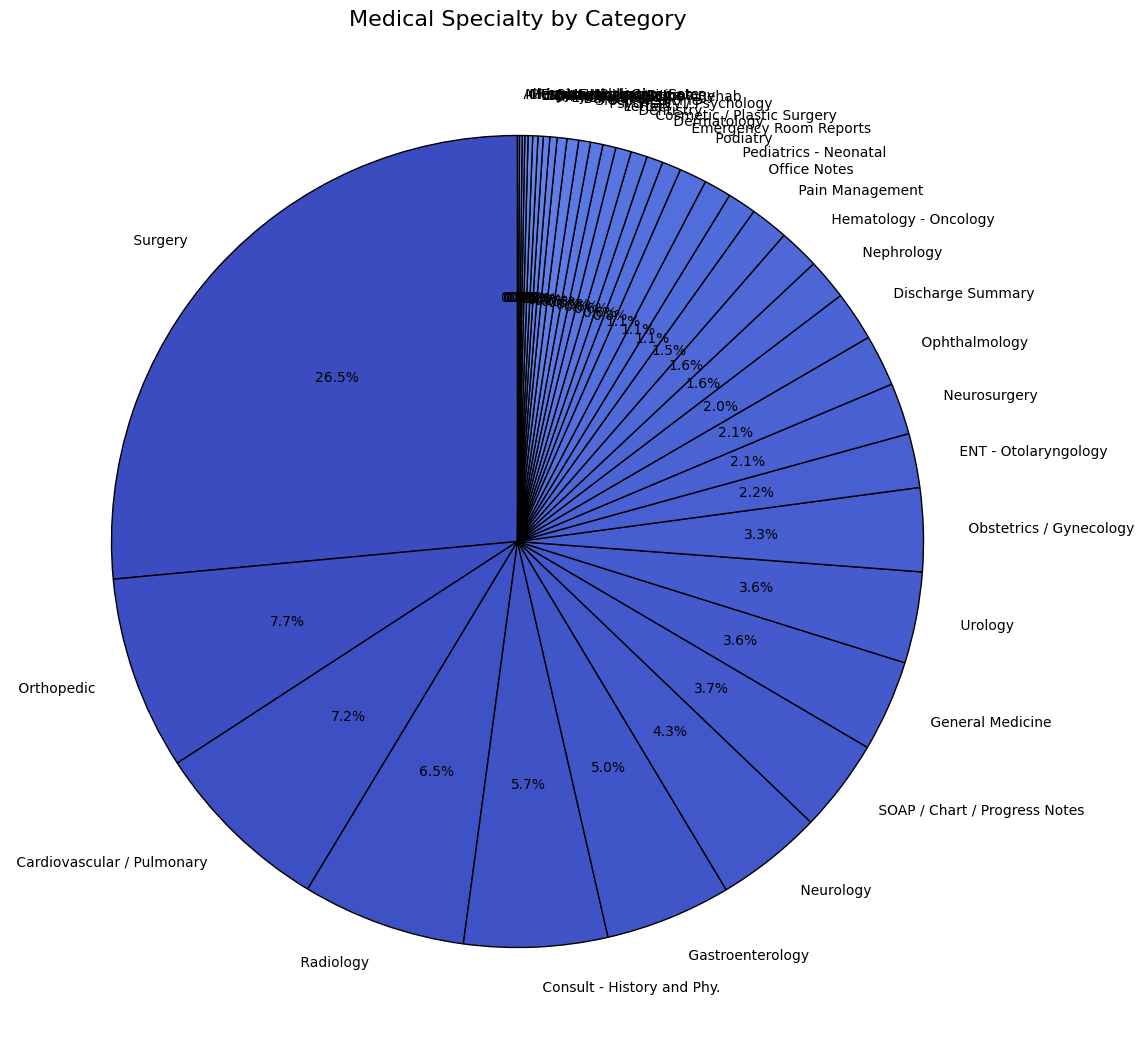

In [ ]:
# YOUR CODE HERE
targetLabels = medical_specialtyCount.index

# Create a square figure and axes
plt.figure(figsize=(29, 29))  # Increased size for better spacing
the_grid = GridSpec(2, 2)

# Color map for the pie chart (coolwarm)
colors = plt.get_cmap("coolwarm")(range(len(targetLabels)))  # Apply coolwarm color map

# Create the pie chart with color coding
plt.subplot(the_grid[0, 0])  # Place the pie chart in the first grid cell
plt.pie(medical_specialtyCount, labels=targetLabels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, labeldistance=1.1)

# Add title and show the plot
plt.title("Medical Specialty by Category", fontsize=16)
plt.show()

### Pre-process `transcription` and `keywords` text

**Exercise 5: Create functions to perform below tasks: [0.5 Mark]**

- Convert transcription and keywords text to lowercase
- Remove quotes from transcription and keywords text
- Remove all the special characters/punctuations
- Remove digits from transcription and keywords text
- Remove extra spaces

- **Convert `transcription` and `keywords` text to lowercase**

In [ ]:
# Convert transcription and keywords text to lowercase
# YOUR CODE HERE
df_lower = df.copy()
df_lower['transcription'] = df_lower['transcription'].str.lower()
df_lower['keywords'] = df_lower['keywords'].str.lower()
print(df_lower.head)

<bound method NDFrame.head of                                                                                                                                                                                                   description  \
0                                                                                                                                            A 23-year-old white female presents with complaint of allergies.   
1                                                                                                                                                                    Consult for laparoscopic gastric bypass.   
2                                                                                                                                                                    Consult for laparoscopic gastric bypass.   
3                                                                                                                                     

- **Remove quotes from `transcription` and `keywords` text**

In [ ]:
# Remove quotes from transcription and keywords text
# YOUR CODE HERE
 #Remove special Characters
import re
import string
df_lower['transcription'] = df_lower['transcription'].str.replace(r'[\'"]', '', regex=True)
df_lower['keywords'] = df_lower['keywords'].str.replace(r'[\'"]', '', regex=True)



- **Remove punctuations**

In [ ]:
# Remove punctuations
# YOUR CODE HERE
translator = str.maketrans('', '', string.punctuation)

df_lower['transcription'] = df_lower['transcription'].str.translate(translator)
df_lower['keywords'] = df_lower['keywords'].str.translate(translator)


- **Remove digits from `transcription` and `keywords` text**

In [ ]:
# Remove digits from transcription and keywords sentences
# YOUR CODE HERE
translator = str.maketrans('', '', '0123456789')
df_lower['transcription'] = df_lower['transcription'].str.translate(translator)
df_lower['keywords'] = df_lower['keywords'].str.translate(translator)


- **Remove extra spaces**

In [ ]:
# Remove extra spaces
# YOUR CODE HERE
df_lower['transcription'] = df_lower.transcription.str.replace('(transcription)(\s+)(\d)', r'\1\3')
#df_lower['keywords'] = df_lower['keywords'].str.rstrip().lstrip()
df_lower['keywords'] = df_lower.keywords.str.replace('(keywords)(\s+)(\d)', r'\1\3')
df_lower.head()



,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with complaint of allergies.,Allergy / Immunology,Allergic Rhinitis,subjective this yearold white female presents with complaint of allergies she used to have allergies when she lived in seattle but she thinks they are worse here in the past she has tried clari...,allergy immunology allergic rhinitis allergies asthma nasal sprays rhinitis nasal erythematous allegra sprays allergic
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbing stairs difficulty with airline seats tying shoes used to public seating and lifting objects off the floor he exercises three times a week at home a...,bariatrics laparoscopic gastric bypass weight loss programs gastric bypass atkins diet weight watchers body weight laparoscopic gastric weight loss pounds months weight laparoscopic band loss diet...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc today he is a very pleasant gentleman who is years old pounds he is he has a bmi of he has been overweight for ten years since the age of at hi...,bariatrics laparoscopic gastric bypass heart attacks body weight pulmonary embolism potential complications sleep study weight loss gastric bypass anastomosis loss sleep laparoscopic gastric bypas...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,d mmode left atrial enlargement with left atrial diameter of cm normal size right and left ventricle normal lv systolic function with left ventricular ejection fraction of normal lv diasto...,cardiovascular pulmonary d mmode doppler aortic valve atrial enlargement diastolic function ejection fraction mitral mitral valve pericardial effusion pulmonary valve regurgitation systolic funct...
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thickness appear normal the wall motion and left ventricular systolic function appears hyperdynamic with estimated ejection fraction of to there is ...,cardiovascular pulmonary d doppler echocardiogram annular aortic root aortic valve atrial atrium calcification cavity ejection fraction mitral obliteration outflow regurgitation relaxation patter...


**Exercise 6: Remove the stopwords from `transcription` text [0.5 Mark]**

- **Remove stopwords**

In [ ]:
# Function to remove the stopwords

def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))  # Use English stopwords
    words = text.split()  # Split text into words

    filtered_words = [w for w in words if w.lower() not in stop_words]

    return ' '.join(filtered_words)
    # YOUR CODE HERE

In [ ]:
# Remove stopwords from transcriptions
# YOUR CODE HERE
#df_lower['cleaned_transcription'] = df_lower['transcription'].apply(remove_stopwords)
stop_words = set(stopwords.words('english'))
df_lower['transcription'] = df_lower['transcription'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

**[OPTIONAL]** Visualize the distribution of word counts in both `transcription` and `keywords` text.

**Hint:**
- Get the text length of each sample
- pd.DataFrame().hist() OR sns.histplot()

<Axes: xlabel='keywords_count', ylabel='Count'>

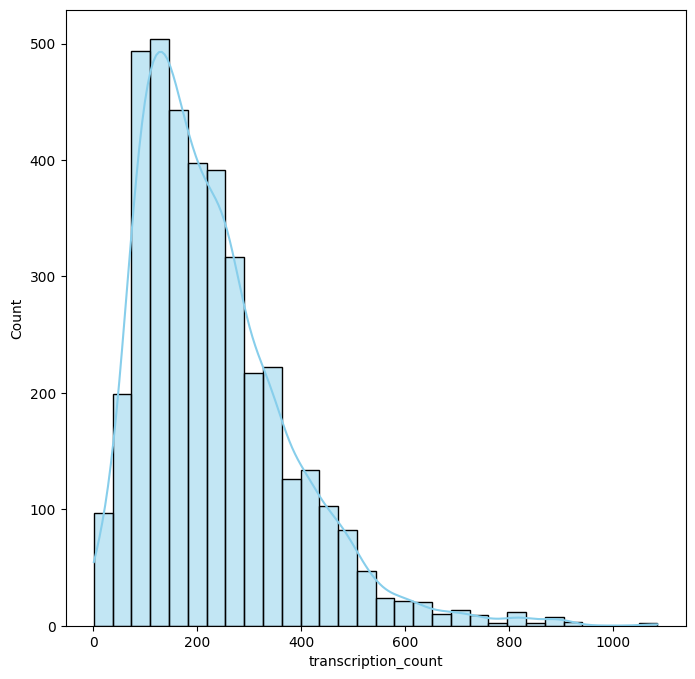

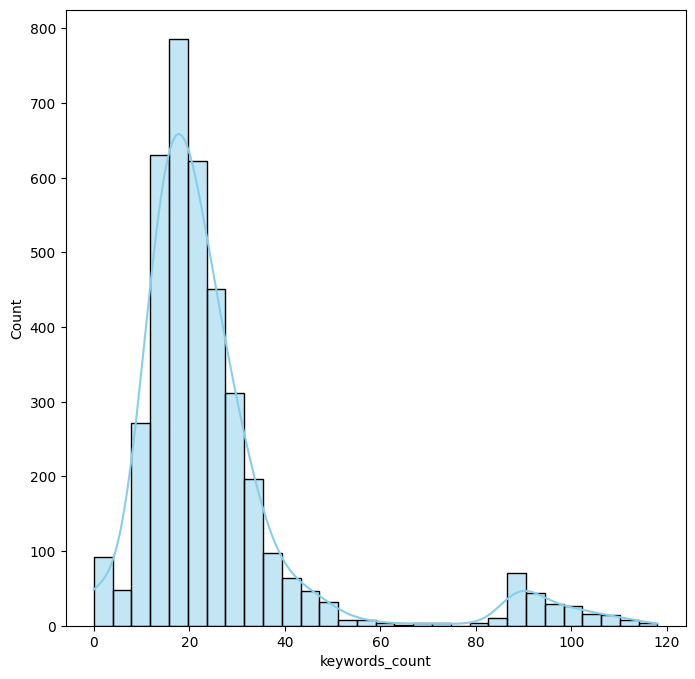

In [ ]:
# Visualize the distribution of word counts
# YOUR CODE HERE
df_lower['transcription_count'] = df_lower['transcription'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 8))
sns.histplot(df_lower['transcription_count'], kde=True, bins=30, color='skyblue')

df_lower['keywords_count'] = df_lower['keywords'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 8))
sns.histplot(df_lower['keywords_count'], kde=True, bins=30, color='skyblue')


### Select the maximum sequence length for both `transcription` and `keywords`

In [ ]:
# Fix the maximum length of the transcript
# Fix the maximum keywords length

max_len_transcript = 250
max_len_keywords = 30
df_copy = df_lower.copy()
print(df_copy.head())

                                                         description  \
0   A 23-year-old white female presents with complaint of allergies.   
1                           Consult for laparoscopic gastric bypass.   
2                           Consult for laparoscopic gastric bypass.   
3                                             2-D M-Mode. Doppler.     
4                                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                                                                                        

**Exercise 7: Add `'start'` and `'end'` to `keywords` text at the beginning and end respectively [0.5 Mark]**

- 'start' will represent the beginning of output sequence
- 'end' will represent the end of output sequence

In [ ]:
# Add 'start' and 'end' to keywords text
# YOUR CODE HERE
df_lower['keywords'] = '[start] ' + df_lower['keywords'] + ' [end]'
print(df_lower.head())

                                                         description  \
0   A 23-year-old white female presents with complaint of allergies.   
1                           Consult for laparoscopic gastric bypass.   
2                           Consult for laparoscopic gastric bypass.   
3                                             2-D M-Mode. Doppler.     
4                                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                                                                                        

### Split data into training and testing set

- test_size=0.1
- random_state=0
- shuffle=True

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (90% training, 10% testing) using stratified splitting based on 'label'
train_df, val_df = train_test_split(df_lower,test_size=0.1,  random_state=0,shuffle=True)

# Split the training data further into training and validation sets (80% training, 20% validation) using stratified splitting
#train_df, test_df = train_test_split(train_test_df, test_size=0.2, stratify=train_test_df['label'], random_state=42)

# Display the sizes of each split
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(val_df)}')
#print(f'Test set size: {len(test_df)}')


Training set size: 3508
Validation set size: 390


### Tokenization and padding

**Exercise 8: Convert the `transcription` and `keywords` text to sequence of integer values, and make them of uniform length [0.5 Mark]**

- Use two tokenizers to tokenize transcription and keywords separately
  
  **Hint:** [Tokenizer()](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer), `.fit_on_texts()`, `.texts_to_sequences()`

- Pad/Truncate both sequences as per their max sequence length specified in above exercises
    - use padding='post', truncating='post'
    - for transcription, (use maxlen= max_len_transcript)
    - for keywords, (use maxlen= max_len_keywords + 1)

  **Hint:** [`pad_sequences(`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)`sequences= , maxlen= , padding='post', truncating='post')`

- For long keywords sequences, the 'end' token might get truncated
    - replace the last token with the token index of 'end'

- save the vocab size for both sequences

In [ ]:
# Instantiate tokenizer for transcripts
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
transcription_tokenizer = Tokenizer()

# Fit on training data
# YOUR CODE HERE
transcription_tokenizer.fit_on_texts(train_df['transcription'])
# Convert transcript sequences into integer sequences for both train and val set
# YOUR CODE HERE
train_transcription_sequences = transcription_tokenizer.texts_to_sequences(train_df['transcription'])
val_transcription_sequences = transcription_tokenizer.texts_to_sequences(val_df['transcription'])
# Add zero padding upto maximum length
# YOUR CODE HERE

padded_transcriptions = pad_sequences(
        train_transcription_sequences,
        maxlen=max_len_transcript,
        padding='post',
        truncating='post'
    )

val_padded_transcriptions = pad_sequences(
        val_transcription_sequences,
        maxlen=max_len_transcript,
        padding='post',
        truncating='post'
    )
# x vocab size
x_voc_size = len(transcription_tokenizer.word_index) +1
x_voc_size

27405

In [ ]:
# Instantiate tokenizer for keywords

keywords_tokenizer = Tokenizer()

# Fit on training data
# YOUR CODE HERE
keywords_tokenizer.fit_on_texts(train_df['keywords'])
# Convert keywords sequences into integer sequences for train and val set
# YOUR CODE HERE
train_keyword_sequences = keywords_tokenizer.texts_to_sequences(train_df['keywords'])
val_keyword_sequences = keywords_tokenizer.texts_to_sequences(val_df['keywords'])
# Add zero padding upto maximum length
# YOUR CODE HERE

padded_keywords = pad_sequences(
        train_keyword_sequences,
        maxlen=max_len_keywords + 1,
        padding='post',
        truncating='post'
    )
val_padded_keywords = pad_sequences(
        val_keyword_sequences,
        maxlen=max_len_keywords + 1,
        padding='post',
        truncating='post'
    )
# y vocab size
y_voc_size = len(keywords_tokenizer.word_index) +1
y_voc_size

5900

- **For long keywords sequences, replace the last token with the token index of 'end'**

In [ ]:
print(keywords_tokenizer.word_index['end'])

1


In [ ]:
# Replace the last token with the token index of 'end' for long sequences

# Apply on Train keywords set
# YOUR CODE HERE
#transcriptions_with_end = [text + " end" for text in train_df['transcription']]
train_keywords_with_end = [text + " end" for text in train_df['keywords']]
# Apply on Validation keywords set
# YOUR CODE HERE
val_keywords_with_end = [text + " end" for text in val_df['keywords']]
print(val_keywords_with_end)

['[start] orthopedic austinmoore bipolar hemiarthroplasty subcapital left hip fracture hip fracture austin moore bipolar hemiarthroplasty subcutaneous tissues hip hemiarthroplasty austin cemented femur subcapital fracture femoral [end] end', '[start] ophthalmology cosmetic surgery jaeger lid plate lacrilube qtip blepharoplasty conjunctiva facial asymmetry fat pad lower lid midface lift regional field block temporal fascia temporal fossa vasoconstriction true temporal fascia gingivobuccal sulcus gingivobuccal [end] end', '[start] orthopedic rotator cuff tear shoulder labrum lesion decompression subacromial arthroscopic slap lesion slap lesion rotator cuff anterior arthroscopy arthroscopic slap cuff [end] end', '[start] ophthalmology diopter intraocular lens insertio phacoemulsification posterior chamber diamond keratome anterior chamber capsular bag intraocular lens intraocular allergan eye capsular chamber lens [end] end', '[start] surgery ng tube chest tubes endotracheal tube pulmonar

### Positional Embedding

**Exercise 9: Create a class, `PositionalEmbedding` [1 Mark]**

- Use `mask_zero=True`, while defining token embeddings layer

- Make sure to make this layer a mask-generating layer by adding a method `compute_mask()`

In [ ]:
class PositionalEmbedding(layers.Layer):

    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        # YOUR CODE HERE ...
 # input_dim = (token) vocabulary size, output_dim = embedding size
        super().__init__(**kwargs)

        # Embedding layer for token embeddings:
        # Converts tokens into dense vector representations of size `output_dim`.
        self.token_embeddings = layers.Embedding(input_dim=input_dim, output_dim=output_dim)
        # Q: what is input_dim and output_dim? A: vocab size, embedding dim

        # Embedding layer for positional embeddings:
        # Assigns a unique embedding to each position in the sequence (0 to sequence_length-1).
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=output_dim)
        # Q: Why input_dim = seq_length?  A: there are seq_len; no. of possible positions
        # Q: What is the vocab for this Embedding layer? A: seq_length

        # Store the sequence length, input dimension, and output dimension.
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
    def call(self, inputs):
        # YOUR CODE HERE ...
       # Extract the sequence length dynamically from the input tensor.
        length = tf.shape(inputs)[-1]  # `length` will just be sequence length.

        # Generate position indices (0 to sequence_length-1) for the input sequence.
        positions = tf.range(start=0, limit=length, delta=1)  # Indices for input to positional embedding.

        # Convert token IDs in `inputs` to dense embeddings using `token_embeddings`.
        embedded_tokens = tf.reshape(self.token_embeddings(inputs), (-1, length, self.output_dim))

        # Convert position indices to dense embeddings using `position_embeddings`.
        embedded_positions = tf.reshape(self.position_embeddings(positions), (-1, length, self.output_dim))

        # Add token embeddings and positional embeddings element-wise.
        return layers.Add()([embedded_tokens, embedded_positions])  # ADD the em
    def compute_mask(self, inputs, mask=None):
        if mask is None:
            return None  # If no mask is provided, return None.
        # Generate a boolean mask where tokens equal to 0 (padding tokens) are marked as False.
        return tf.math.not_equal(inputs, 0)  # Mask will get propagated to the next layer.

    def get_config(self):
        # YOUR CODE HERE
       # Get the configuration of the parent class and update it with custom attributes.
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,        # Embedding dimension size.
            "sequence_length": self.sequence_length,  # Maximum sequence length.
            "input_dim": self.input_dim,         # Vocabulary size.
        })
        return config


### Encoder Block

**Exercise 10: Create a class, `TransformerEncoder` [1 Mark]**

- While calling `attention` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [ ]:
class TransformerEncoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim,num_heads, **kwargs):
       # Initialize the parent Layer class with any additional keyword arguments.
        super().__init__(**kwargs)

        # Store the embedding dimension, which defines the size of input embeddings (e.g., 4 in a dummy example).
        self.embed_dim = embed_dim

        # Define the size of the dense (fully connected) layer in the feedforward network within the encoder.
        self.dense_dim = dense_dim

        # Define the number of attention heads in the Multi-Head Attention mechanism.
        self.num_heads = num_heads

        # Create a Multi-Head Attention layer for self-attention, with specified number of heads and embedding dimension.
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

        # Build a feedforward neural network (FFN) with two dense layers.
        # The first layer uses ReLU activation, and the second projects back to the embedding dimension.
        self.dense_proj = keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),  # Expands to `dense_dim`.
            layers.Dense(embed_dim)                      # Projects back to `embed_dim` to match input shape.
        ])

        # Layer normalization for stabilizing training and improving convergence.
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
       # Apply masking if a mask is provided, adding a new axis to the mask tensor.
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
            print(f"**test: mask in not None. mask = {mask}")

        # Perform self-attention with inputs as query, key, and value.
        # This makes it a "self-attention" mechanism as all arguments come from the same source (inputs).
        attention_output = self.attention(
            query=inputs,             # The query tensor.
            value=inputs,             # The value tensor.
            key=inputs,               # The key tensor.
            attention_mask=mask       # Optional attention mask.
        )

        # Apply residual connection and normalization after the attention step.
        proj_input = self.layernorm_1(inputs + attention_output)

        # Pass the normalized result through the feedforward network.
        proj_output = self.dense_proj(proj_input)

        # Apply another residual connection and normalization after the feedforward network.
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        # Retrieve the configuration from the parent class and update it with custom attributes.
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,  # Embedding dimension.
            "num_heads": self.num_heads,  # Number of attention heads.
            "dense_dim": self.dense_dim,  # Size of the dense layer in the FFN.
        })
        return config

### Decoder Block

**Exercise 11: Create a class, `TransformerDecoder` [1 Mark]**

- Do not create any separate function to get causal attention mask, just pass `use_causal_mask = True` parameter while calling `attention_1` layer

- While calling `attention_2` layer, do not use `attention_mask` parameter

- In Feed forward network, add `Dropout(0.1)` layer after 2 dense layers

- For skip connections, use `tf.keras.layers.Add()` instead of `'+'`

In [ ]:
class TransformerDecoder(layers.Layer):

    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
       # Define the layers. Let's point them out in the diagram
        super().__init__(**kwargs)
        self.embed_dim = embed_dim  # Dimension of embedding (e.g., 256)
        self.dense_dim = dense_dim  # Number of neurons in dense layer (e.g., 32)
        self.num_heads = num_heads  # Number of heads for MultiHead Attention layer

        # Now we have 2 MultiHead Attention layers - one for self attention and one for generalized attention
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  # Self-attention
        self.attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)  # Cross-attention
        self.dense_proj = keras.Sequential([layers.Dense(dense_dim, activation="relu"),  # Fully connected layers
                                            layers.Dense(embed_dim),]
                                           )
        # Layer normalization for stabilizing training and improving performance
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()

        self.supports_masking = True  # Ensures that the layer will propagate its input mask to its outputs

    def get_config(self):
        # Provides a configuration dictionary for the custom layer, for model serialization
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config
    def get_causal_attention_mask(self, inputs):
        # Generates a causal attention mask to prevent the decoder from attending to future tokens
        input_shape = tf.shape(inputs)  # Get the shape of the input tensor
        batch_size, sequence_length = input_shape[0], input_shape[1]  # Extract batch size and sequence length

        # Generate a causal mask by comparing indices i and j (where i >= j means attention is allowed)
        i = tf.range(sequence_length)[:, tf.newaxis]  # Create a column vector of sequence indices
        j = tf.range(sequence_length)  # Create a row vector of sequence indices
        mask = tf.cast(i >= j, dtype="int32")  # True (1) for valid positions, False (0) for invalid positions
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))  # Reshape to (1, seq_len, seq_len)

        # Concatenate batch size to create a multiplier for tiling
        mult = tf.concat([tf.expand_dims(batch_size, -1),  # Expand batch size to match shape
                          tf.constant([1, 1], dtype=tf.int32)],  # Keep the other dimensions unchanged
                         axis=0
                         )

        # Tile the mask according to the batch size
        return tf.tile(mask, mult)
    def call(self, inputs, encoder_outputs, mask=None): # two inputs: decoder i/p and encoder o/p
       # `inputs`: decoder input sequence
        # `encoder_outputs`: output of the encoder (key-value pairs for cross-attention)
        # `mask`: optional mask for padding (e.g., for handling padded tokens)

        # Generate a causal mask to prevent attending to future tokens
        causal_mask = self.get_causal_attention_mask(inputs)

        # Padding mask: if provided, it prevents attending to padding tokens in the encoder output
        padding_mask = None
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")  # Expand mask for attention compatibility
            padding_mask = tf.minimum(padding_mask, causal_mask)  # Union of padding and causal mask (0s prevent attention)

        # First attention layer (self-attention)
        attention_output_1 = self.attention_1(query=inputs,  # Query: decoder inputs
                                              value=inputs,  # Value: decoder inputs
                                              key=inputs,    # Key: decoder inputs
                                              attention_mask=causal_mask  # Causal mask prevents future token attention
                                              )

        # Apply layer normalization after adding the attention output to the input (residual connection)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)

        # Second attention layer (cross-attention) using encoder outputs as key and value
        attention_output_2 = self.attention_2(query=attention_output_1,  # Query: output from first attention layer
                                              value=encoder_outputs,  # Value: encoder outputs (key-value pairs)
                                              key=encoder_outputs,    # Key: encoder outputs
                                              attention_mask=padding_mask,  # Padding mask if provided
                                              )

        # Apply layer normalization after adding the attention output to the input (residual connection)
        attention_output_2 = self.layernorm_2(attention_output_1 + attention_output_2)

        # Apply a dense projection after the second attention layer
        proj_output = self.dense_proj(attention_output_2)

        # Apply final layer normalization with residual connection
        return self.layernorm_3(attention_output_2 + proj_output)

### Build Transformer model

**Exercise 12: Create a transformer model with below points: [1 Mark]**

- Use the respective vocabulary size for PositionalEmbedding of encode and decoder inputs

- Add `Dropout(0.1)` layers after both encoder and decoder PositionalEmbedding layers

- Do not use `activation="softmax"` for the last dense classification layer (You will be required to create a custom loss, and metric in the next stage.)

- Add a stack of 4 encoder blocks and 4 decoder blocks to your transformer

In [ ]:
# Create transformer model
vocab_size = y_voc_size          # The size of the vocabulary (number of unique tokens).
sequence_length = max_len_keywords + 1 # Modified sequence length to match max keywords length + 1 for start token
embed_dim = 256
dense_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,))

# Add a PositionalEmbedding layer to combine token and positional embeddings.

x = PositionalEmbedding(max_len_transcript, x_voc_size, embed_dim)(encoder_inputs)  # Apply positional embedding for encoder, using max_len_transcript
# Q: First arg acts like a 'vocabulary' for pos embedding layer. A: The first argument corresponds to sequence length, which determines how many unique positions need to be embedded.
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)  # Pass through the Transformer encoder
# Q: What are these arguments? A: embedding dimension, number of neurons in the dense layer, number of heads in the multi-head attention layer.




decoder_inputs = keras.Input(shape=(None,))
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)  # Apply positional embedding for decoder, using sequence_length
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)  # Pass through the Transformer decoder, taking encoder output as context
# Q: What are the call arguments in the picture? A: The decoder receives the embedded inputs and the encoder's output to perform cross-attention.

x = layers.Dropout(0.5)(x)  # Apply dropout to prevent overfitting
#decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)  # Output layer with softmax activation for predicting the next word in Spanish

decoder_outputs = layers.Dense(y_voc_size)(x)

transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
transformer.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding      │ (None, None, 256)      │      7,079,680 │ input_layer[0][0]      │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ positional_embedding_1    │ (None, None, 256)      │      1,518,336 │ input_layer_2[0][0]    │
│ (PositionalEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder       │ (None, None, 256)      │      3,155,456 │ positional_embedding[… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_decoder       │ (None, None, 256)      │      5,259,520 │ positional_embedding_… │
│ (TransformerDecoder)      │                        │                │ transformer_encoder[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, None, 256)      │              0 │ transformer_decoder[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, None, 5900)     │      1,516,300 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 18,529,292 (70.68 MB)

 Trainable params: 18,529,292 (70.68 MB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation and Training [1 Mark]

**Exercise 13: Set up the optimizer**

Refer [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_optimizer) for the following steps:

- Use the Adam optimizer with a custom learning rate scheduler

- Instantiate the Adam optimizer with custom learning rate

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
 def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

 def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [ ]:
# Instantiate the Adam optimizer with custom learning rate
# YOUR CODE HERE
learning_rate = CustomSchedule(embed_dim)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

**Exercise 14: Set up the loss and metrics**

- Apply a padding mask while calculating the loss with cross-entropy loss function as demonstrated [here](https://www.tensorflow.org/text/tutorials/transformer#set_up_the_loss_and_metrics).  

In [ ]:
def masked_loss(label, pred):
    # YOUR CODE HERE
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
    # YOUR CODE HERE
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

**Exercise 15: Compile transformer model with custom optimizer, loss, and metric & perform training [0.5 Mark]**

- Use [*transcription sequences*, and *keywords sequences(shifted right)*] as input to transformer

- Train model using colab's GPU runtime with batch_size=32, and epochs=30. (It might take one minute per epoch with GPU)

**Hint:** Check if the training code is running without any errors with CPU runtime, later switch to GPU runtime for faster training. Once trained, save the model weights, and download into your system for later use.

In [ ]:
# Compile

def prepare_data_for_transformer(padded_transcriptions,padded_keywords):
    """
    Prepare the input data for the transformer model.
    """
    X = padded_transcriptions
    y = padded_keywords

    # Create decoder input by shifting keywords right
    decoder_input = np.zeros_like(y)
    decoder_input[:, 1:] = y[:, :-1]
    # Set first token to start token (could use a specific start token index)
    decoder_input[:, 0] = 1

    return X, decoder_input, y




In [ ]:
X, decoder_input, y = prepare_data_for_transformer(padded_transcriptions,padded_keywords)
X_val, decoder_input_val, y_val = prepare_data_for_transformer(val_padded_transcriptions,val_padded_keywords)
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy]
)

In [ ]:
 # Create callbacks
callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=2
        )
    ]

In [ ]:
'''
import pandas as pd
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
#test_ds = Dataset.from_pandas(test_df)

ds = DatasetDict()


ds['train'] = train_ds
ds['validation'] = val_ds
#ds['test'] = test_ds
'''

ModuleNotFoundError: No module named 'datasets'

In [ ]:
# Train

# YOUR CODE HERE
history = transformer.fit(
        [X, decoder_input], y,
        validation_data=([X_val, decoder_input_val], y_val),
        batch_size=32,
        epochs=1,
        callbacks=callbacks
    )

110/110 ━━━━━━━━━━━━━━━━━━━━ 1183s 11s/step - loss: 8.6994 - masked_accuracy: 0.0121 - val_loss: 8.2431 - val_masked_accuracy: 0.0882 - learning_rate: 2.7176e-05


### Save model weights

In [ ]:
!mkdir my_model_weights

In [ ]:
# Save model weights
# It will create a '.weights.h5' file which can be downloaded into your system from colab

transformer.save_weights('my_model_weights/my_weights.weights.h5')

In [ ]:
# OR
# Make a zip file, which also can be downloaded into your system from colab

!zip -r 'my_model_weights.zip' 'my_model_weights'

  adding: my_model_weights/ (stored 0%)
  adding: my_model_weights/my_weights.weights.h5 (deflated 10%)


### Load model weights

Whenever you need to use this trained model weights:
* use the model architecture to create exact same model
* then load the trained weights directly using below code

In [ ]:
# To load model weights
transformer.load_weights('my_model_weights/my_weights.weights.h5')

## Run Inference

**Exercise 16: Create a function to extract keywords, given transcription text as input [1 Mark]**

- Encode the input sentence using the Transcription tokenizer. This is the encoder input
- Initialize decoder input with the 'start' token
- The decoder then outputs the predictions by looking at the encoder output and its own output (self-attention).
- Concatenate the predicted token to the decoder input and pass it to the decoder repeatedly
- Make decoder predict the next token based on the previous tokens it has predicted

In [ ]:
# Instantiate tokenizer for keywords
#keywords_tokenizer = Tokenizer() # Add oov_token
keywords_tokenizer = Tokenizer(oov_token='<OOV>')
# Fit on training data
keywords_tokenizer.fit_on_texts(train_df['keywords'])


def extract_keywords(sentence, transformer=transformer):
    """ Takes an input sentence, and transformer. Returns extracted keywords. """

    # Convert input sentence into integer sequence (Note that tokenizer.texts_to_sequences() take list of text as input)
    ip_tokens = transcription_tokenizer.texts_to_sequences([sentence])  # Wrap in a list

    # Add zero padding upto maximum length transcription
    ip_tok_seq = pad_sequences(
        ip_tokens,
        maxlen=max_len_transcript,
        padding='post',
        truncating='post'
    )

    # Initialize decoder input with 'start' or '<OOV>' if '[start]' is missing
    start_token = keywords_tokenizer.word_index.get('[start]', keywords_tokenizer.word_index['<OOV>'])
    #start_token = keywords_tokenizer.word_index.get('[start]')
    dec_tok_seq = np.array([start_token])

    # Variable to store the output text string
    keyword_sentence = ''

    for i in range(max_len_keywords):

        # Get output logits from transformer
        pred = transformer([ip_tok_seq, dec_tok_seq.reshape(1, -1)], training=False) # Removed extra reshape
        pred = pred[:, -1:, :]

        # Select the index with max value from 'pred' to get the output token index
        token = np.argmax(pred, axis=-1)[0, 0] # Get token index value

        # Convert output token to word
        if token == 0: # if token is 0 (padding), break
            break

        # Convert output token to word
        word = keywords_tokenizer.index_word[token] # Added missing closing bracket

        # End the loop if word is 'end'
        if word == '[end]':
            break

        # Append 'token' to dec_tok_seq
        dec_tok_seq = np.append(dec_tok_seq, token)  # Append as numerical value

        # Append 'word' to keyword sentence
        keyword_sentence += " " + word

    return keyword_sentence.strip()


In [ ]:
# Predict keywords for a sample input

# YOUR CODE HERE

input_seq = "REASON FOR CONSULTATION: , Glioma.,HISTORY OF PRESENT ILLNESS:,  The patient is a 71-year-old woman who was initially diagnosed with a brain tumor in 1982.  She underwent radiation therapy for this, although craniotomy was not successful for a biopsy because of seizure activity during the surgery.  She did well for the next 10 years or so, and developed Parkinson disease, possibly related to radiation therapy.  She has been followed by neurology, Dr. Z, to treat seizure activity.  She has a vagal stimulator in place to help control her seizure activity.,Over the last few months, she has had increasing weakness on the right side.  She has been living in a nursing home.  She has not been able to walk, and she has not been able to write for the past three to four years.,MRI scan done on 11/13/2006 showed increase in size of the abdominal area and the left parietal region.  There was slight enhancement and appearance was consistent with a medium- to low-grade tumor anterior to the motor cortex.,Surgery was performed during this admission to remove some of the posterior part of the tumor.  She tolerated the procedure well.  She has noticed no worsening or improvement in her weakness.  Pathology shows a low- to intermediate-grade glioma.  The second opinion by Dr. A is still pending.,The patient is feeling well today.  She is not having headache, and reports no new neurologic symptoms.  She has not had leg swelling, cough, shortness of breath, or chest pain.,CURRENT MEDICATIONS:  ,1.  Ambien p.r.n.  ,2.  Vicodin p.r.n.  ,3.  Actonel every Sunday.  ,4.  Colace.  ,5.  Felbatol 1200 mg b.i.d.  ,6.  Heparin injections for prophylaxis.  ,7.  Maalox p.r.n.  ,8.  Mirapex 0.5 mg t.i.d.  ,9.  Protonix 40 mg daily.  ,10.  Tylenol p.r.n.  ,11.  Zanaflex 4-mg tablet, one-half tablet daily and 6 mg at bedtime.  ,12.  She has Zofran p.r.n., albuterol inhaler q.i.d., and Aggrenox, which she is to start.,The rest of the history is mostly from the chart.,ALLERGIES: , SHE IS ALLERGIC TO PENICILLIN.,PAST MEDICAL HISTORY:  ,1.  Parkinson's, likely secondary to radiation therapy.,2.  History of prior stroke.,3.  Seizure disorder secondary to her brain tumor.,4.  History of urinary incontinence.,5.  She has had hip fractures x2, which have required surgical pinning.,6.  Appendectomy.,7.  Cholecystectomy.,SOCIAL HISTORY:,  Shows that she does not smoke cigarettes or drink alcohol.  She lives in a nursing home.,FAMILY HISTORY:,  Shows a family history of breast cancer.,PHYSICAL EXAMINATION:,  ,GENERAL:  Today, she is sitting up in the chair, alert, and appropriate.  She tends to lean towards the right.  The right arm and hand are noticeably weaker than the left.  She is quite thin.,VITAL SIGNS:  Temperature is 98.5, blood pressure is 138/75, pulse is 76, respirations are 16, and pulse oximetry is 92% on room air.,HEENT:  There is a craniotomy incision on the left parietal region, clean, and dry with stitches still in place.  The oropharynx shows no thrush or mucositis.,LUNGS:  Clear bilaterally to auscultation.,CARDIAC:  Exam shows regular rate.,ABDOMEN:  Soft.,EXTREMITIES:  No peripheral edema or evidence of deep venous thrombosis (DVT) is noted on the lower extremities.,IMPRESSION AND PLAN:,  Progressive low-grade glioma, now more than 20 years since initially diagnosed.  She is status post craniotomy for debulking and has done well with the surgery.,We reviewed the phase II trials that have used Temodar in the setting of grade 2 gliomas.  Although, complete responses are rare, it is quite common to have partial response and/or stable disease, and most patients had improved quality of life indices including many patients who benefit from decreased seizure activity.  We discussed using Temodar after she heals from her surgery.  Toxicities would include fatigue, nausea, and myelosuppression primarily. "
extract_keywords(input_seq)

'end and <OOV> end <OOV> end <OOV> end <OOV> end <OOV> end <OOV> end <OOV> end <OOV> end <OOV> end <OOV> <OOV> <OOV> <OOV> end <OOV> end <OOV> end <OOV>'

## Gradio Implementation [OPTIONAL]

Gradio is an open-source python library that allows us to quickly create easy-to-use, customizable UI components for our ML model, any API, or any arbitrary function in just a few lines of code. We can integrate the GUI directly into the Python notebook, or we can share the link with anyone.

In [ ]:
!pip -qq install gradio

In [ ]:
import gradio

In [ ]:
# Input from user
in_transcript = gradio.Textbox(lines=10, placeholder=None, value="transcription", label='Enter Transcription Text')

# Output prediction
out_keywords = gradio.Textbox(type="text", label='Extracted Keywords')


# Gradio interface to generate UI
iface = gradio.Interface(fn = extract_keywords,
                         inputs = [in_transcript],
                         outputs = [out_keywords],
                         title = "Keywords Extraction",
                         description = "Using transformer model, trained from scratch",
                         allow_flagging = 'never')

iface.launch(share = True)

Click on the link generated above to see UI.